<a href="https://colab.research.google.com/github/Anand-1932/Diamond_Price_Prediction/blob/main/Diamond__price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# the given dataset is amount diamond price. based on the given independent feature we have to predict the price of the diamond. we will use the machine learning algorithm to create the model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/Diamond Price prediction.csv")
data

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [ ]:
data.shape

(53940, 11)

# Basic Checks

In [ ]:
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [ ]:
data.tail()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [ ]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [ ]:
data.describe(include='O')

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

# EDA (Exploratory Data Analysis)

In [ ]:
# importing ydata profiling
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b72b4395b527aa87ef7db735759c58afb0905ed3db06fcf0adaa3c670b3e13e0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
EDA= ProfileReport(data,title='EDA',explorative=False)
EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Insights from EDA

*   The given dataset has 11 columns. 8 numerical and 3 categorical column.

*   Carat is highly coorelated with price.

*   x, y, z and carat is highly coorelated with each other


*   Dataset has no missing value.

*   x, y, z are almost idential since it has coorelation of almost 99.9% with each other.







# Data Preprocessing

In [ ]:
data.value_counts()

Unnamed: 0  carat  cut        color  clarity  depth  table  price  x     y     z   
1           0.23   Ideal      E      SI2      61.5   55.0   326    3.95  3.98  2.43    1
35978       0.35   Very Good  G      VVS1     59.3   61.0   921    4.58  4.62  2.73    1
35954       0.30   Ideal      F      SI1      61.4   58.0   475    4.30  4.33  2.65    1
35955       0.30   Ideal      F      SI1      62.5   56.0   475    4.28  4.30  2.68    1
35956       0.30   Ideal      F      SI1      62.5   57.0   475    4.30  4.31  2.69    1
                                                                                      ..
17984       1.06   Premium    E      VS2      61.3   58.0   7275   6.52  6.56  4.01    1
17985       1.07   Ideal      G      VS2      61.9   55.0   7275   6.55  6.57  4.06    1
17986       1.07   Ideal      G      VS2      61.4   57.0   7275   6.56  6.63  4.05    1
17987       1.06   Ideal      E      VS2      61.9   55.0   7275   6.54  6.58  4.06    1
53940       0.75   Ideal      D      SI2      62.2   55.0   2757   5.83  5.87  3.64    1
Name: count, Length: 53940, dtype: int64

In [ ]:
# looking for missing value
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

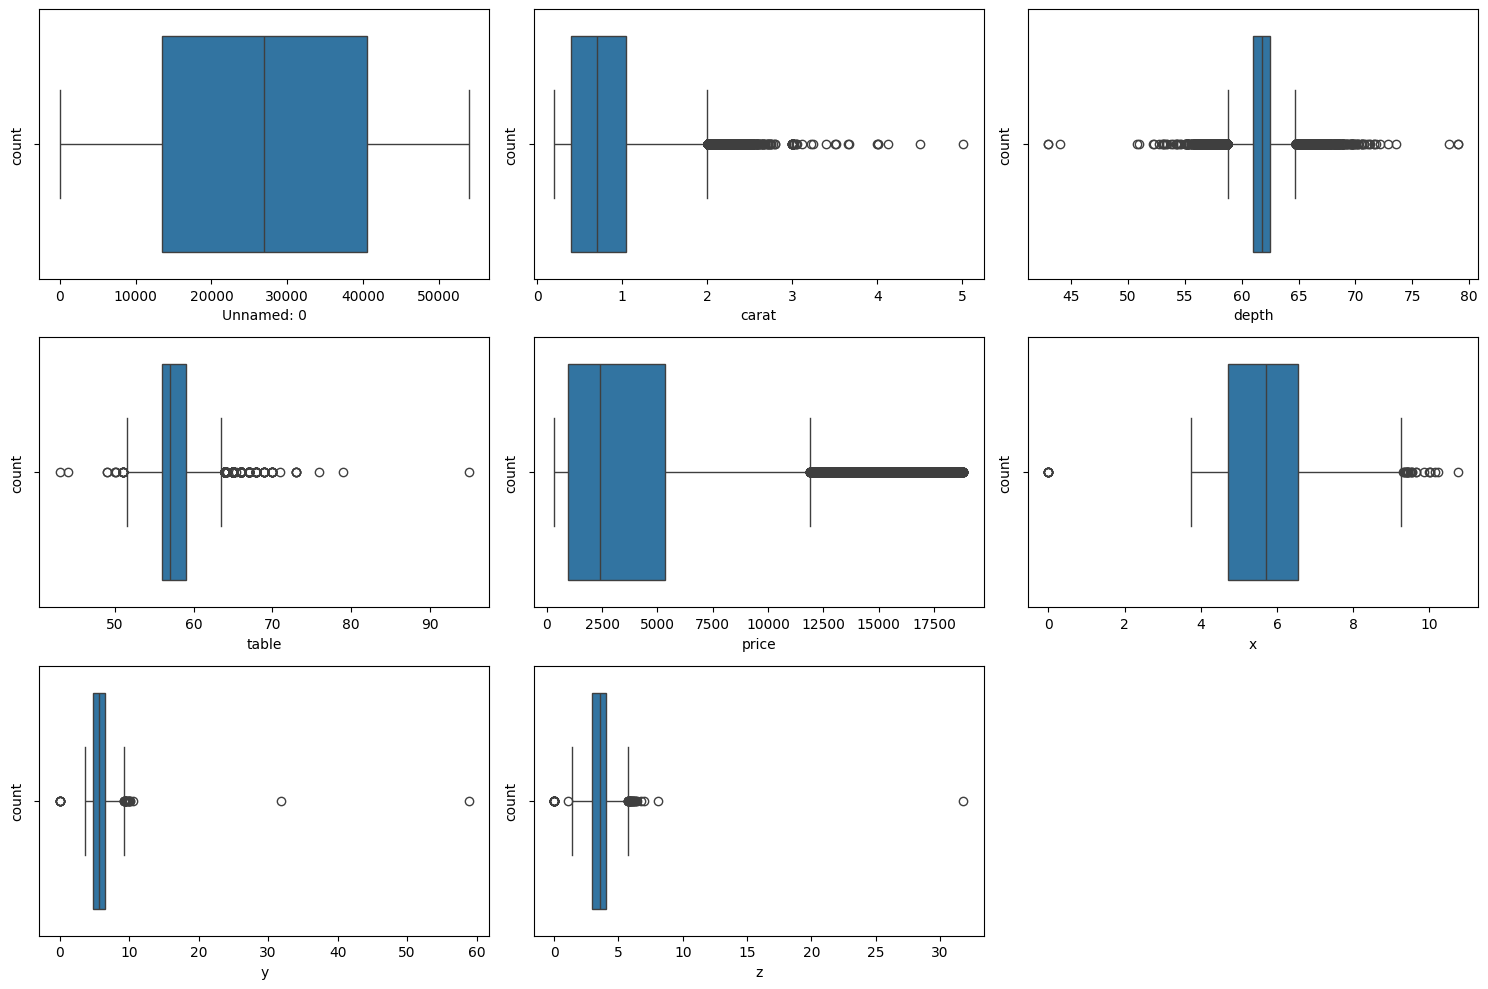

In [ ]:
# checking for outliers
plt.figure(figsize=(15,10), facecolor='white')
plotnumber=1

for i in data.select_dtypes(include='number').columns:
  if plotnumber<=8:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(x=data[i])
    plt.xlabel(i,fontsize=10)
    plt.ylabel('count', fontsize=10)

    plotnumber+=1

plt.tight_layout()

In [ ]:
# checking for duplicated value
data.duplicated().sum()

0

In [ ]:
# since there is no missing and duplicated value we can directly move for handling outlier.

In [ ]:
# Handling missing value with help of winzorization.
def wisker(col):
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lw=Q1-1.5*IQR
  uw=Q3+1.5*IQR
  return lw,uw

In [ ]:
for i in ['carat','depth','table','price','x','y','z']:
  lw,uw=wisker(data[i])
  data[i]=np.where(data[i]<lw,lw,data[i])
  data[i]=np.where(data[i]>uw,uw,data[i])

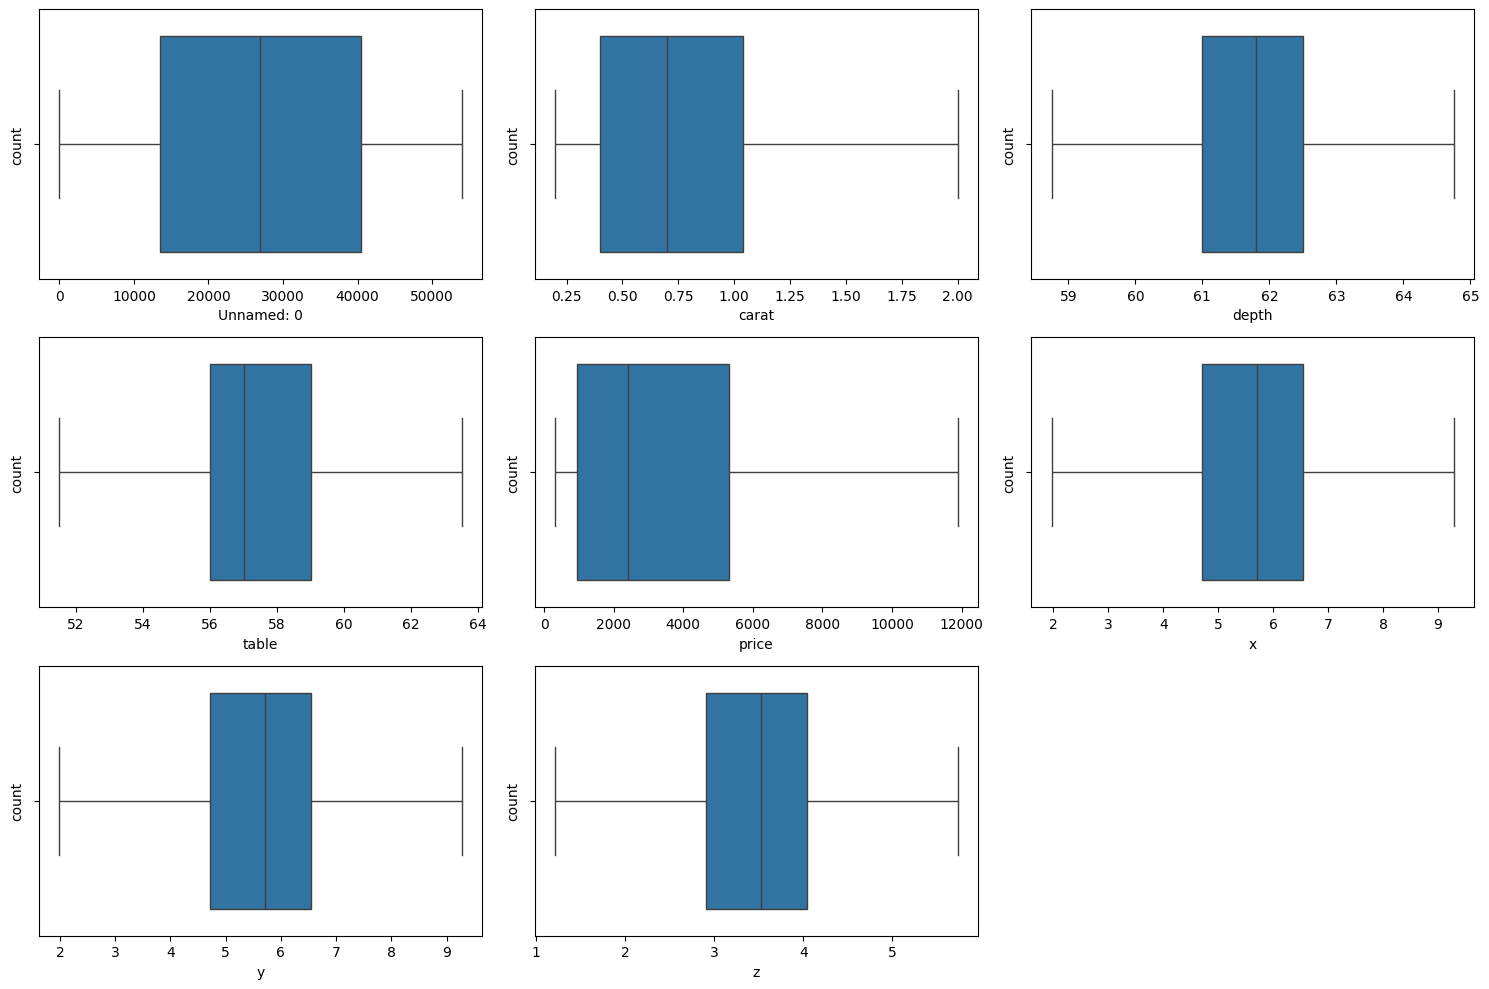

In [ ]:
# checking weather outliers are handled or not
plt.figure(figsize=(15,10), facecolor='white')
plotnumber=1

for i in data.select_dtypes(include='number').columns:
  if plotnumber<=8:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(x=data[i])
    plt.xlabel(i,fontsize=10)
    plt.ylabel('count', fontsize=10)

    plotnumber+=1

plt.tight_layout()

In [ ]:
new_data=data.select_dtypes(include='number').corr()
new_data

Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.391008 -0.037768 -0.105239 -0.354470 -0.406087   
carat        -0.391008  1.000000  0.021868  0.187523  0.936588  0.981862   
depth        -0.037768  0.021868  1.000000 -0.299886 -0.008726 -0.028929   
table        -0.105239  0.187523 -0.299886  1.000000  0.136891  0.198407   
price        -0.354470  0.936588 -0.008726  0.136891  1.000000  0.911965   
x            -0.406087  0.981862 -0.028929  0.198407  0.911965  1.000000   
y            -0.406931  0.981132 -0.031645  0.192469  0.913492  0.998362   
z            -0.407967  0.977447  0.089990  0.158148  0.905016  0.988231   

                   y         z  
Unnamed: 0 -0.406931 -0.407967  
carat       0.981132  0.977447  
depth      -0.031645  0.089990  
table       0.192469  0.158148  
price       0.913492  0.905016  
x           0.998362  0.988231  
y           1.000000  0.987852  
z           0.987852  1.000000

<Axes: >

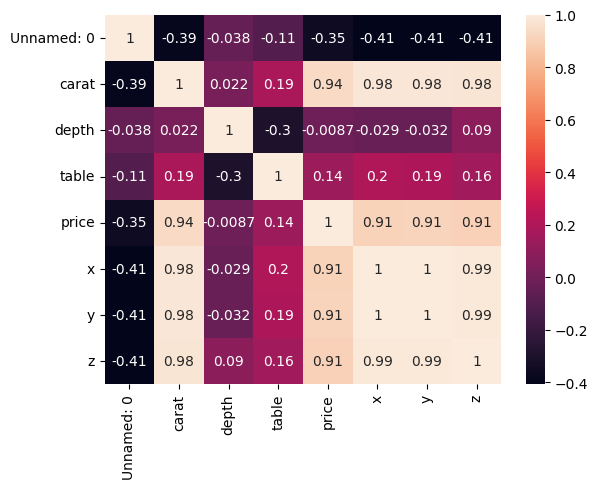

In [ ]:
sns.heatmap(new_data,annot=True)

# Feature Engineering

In [ ]:
# feature encoding
# converting categorical coloum to numerical column

In [ ]:
# importing necesseary library
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
OE=OrdinalEncoder()
OHE=OneHotEncoder()

In [ ]:
data.select_dtypes(include='O').columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
# cut
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
# since there is hierarchy in data we will apply OrdinalEncoding

In [ ]:
# color
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
# we will apply OHE since there in no hierarchy


In [ ]:
# clarity
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
# we will apply OHE since there is no hierarchy

In [ ]:
data['cut']=OE.fit_transform(data[['cut']])
data = pd.get_dummies(data, columns=['color'],dtype='int',drop_first=True)
data = pd.get_dummies(data, columns=['clarity'],dtype='int',drop_first=True)

In [ ]:
data

Unnamed: 0  carat  cut  depth  table   price     x     y     z  \
0               1   0.23  2.0  61.50   55.0   326.0  3.95  3.98  2.43   
1               2   0.21  3.0  59.80   61.0   326.0  3.89  3.84  2.31   
2               3   0.23  1.0  58.75   63.5   327.0  4.05  4.07  2.31   
3               4   0.29  3.0  62.40   58.0   334.0  4.20  4.23  2.63   
4               5   0.31  1.0  63.30   58.0   335.0  4.34  4.35  2.75   
...           ...    ...  ...    ...    ...     ...   ...   ...   ...   
53935       53936   0.72  2.0  60.80   57.0  2757.0  5.75  5.76  3.50   
53936       53937   0.72  1.0  63.10   55.0  2757.0  5.69  5.75  3.61   
53937       53938   0.70  4.0  62.80   60.0  2757.0  5.66  5.68  3.56   
53938       53939   0.86  3.0  61.00   58.0  2757.0  6.15  6.12  3.74   
53939       53940   0.75  2.0  62.20   55.0  2757.0  5.83  5.87  3.64   

       color_E  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0            1  ...        0        0        0           0            0   
1            1  ...        0        0        0           0            1   
2            1  ...        0        0        0           0            0   
3            0  ...        0        1        0           0            0   
4            0  ...        0        0        1           0            0   
...        ...  ...      ...      ...      ...         ...          ...   
53935        0  ...        0        0        0           0            1   
53936        0  ...        0        0        0           0            1   
53937        0  ...        0        0        0           0            1   
53938        0  ...        1        0        0           0            0   
53939        0  ...        0        0        0           0            0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0                1            0            0             0             0  
1                0            0            0             0             0  
2                0            1            0             0             0  
3                0            0            1             0             0  
4                1            0            0             0             0  
...            ...          ...          ...           ...           ...  
53935            0            0            0             0             0  
53936            0            0            0             0             0  
53937            0            0            0             0             0  
53938            1            0            0             0             0  
53939            1            0            0             0             0  

[53940 rows x 22 columns]

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [ ]:
data[['carat', 'cut', 'depth', 'table', 'x', 'y', 'z', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J','clarity_IF',
      'clarity_SI1', 'clarity_SI2', 'clarity_VS1','clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]=scaler.fit_transform(data[['carat', 'cut', 'depth', 'table', 'x', 'y', 'z','color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']])

In [ ]:
data

Unnamed: 0     carat   cut     depth     table   price         x  \
0               1  0.016667  0.50  0.458333  0.291667   326.0  0.271175   
1               2  0.005556  0.75  0.175000  0.791667   326.0  0.262978   
2               3  0.016667  0.25  0.000000  1.000000   327.0  0.284836   
3               4  0.050000  0.75  0.608333  0.541667   334.0  0.305328   
4               5  0.061111  0.25  0.758333  0.541667   335.0  0.324454   
...           ...       ...   ...       ...       ...     ...       ...   
53935       53936  0.288889  0.50  0.341667  0.458333  2757.0  0.517077   
53936       53937  0.288889  0.25  0.725000  0.291667  2757.0  0.508880   
53937       53938  0.277778  1.00  0.675000  0.708333  2757.0  0.504781   
53938       53939  0.366667  0.75  0.375000  0.541667  2757.0  0.571721   
53939       53940  0.305556  0.50  0.575000  0.291667  2757.0  0.528005   

              y         z  color_E  ...  color_H  color_I  color_J  \
0      0.273352  0.268805      1.0  ...      0.0      0.0      0.0   
1      0.254121  0.242257      1.0  ...      0.0      0.0      0.0   
2      0.285714  0.242257      1.0  ...      0.0      0.0      0.0   
3      0.307692  0.313053      0.0  ...      0.0      1.0      0.0   
4      0.324176  0.339602      0.0  ...      0.0      0.0      1.0   
...         ...       ...      ...  ...      ...      ...      ...   
53935  0.517857  0.505531      0.0  ...      0.0      0.0      0.0   
53936  0.516484  0.529867      0.0  ...      0.0      0.0      0.0   
53937  0.506868  0.518805      0.0  ...      0.0      0.0      0.0   
53938  0.567308  0.558628      0.0  ...      1.0      0.0      0.0   
53939  0.532967  0.536504      0.0  ...      0.0      0.0      0.0   

       clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          1.0          0.0          0.0          0.0   
2             0.0          0.0          0.0          1.0          0.0   
3             0.0          0.0          0.0          0.0          1.0   
4             0.0          0.0          1.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
53935         0.0          1.0          0.0          0.0          0.0   
53936         0.0          1.0          0.0          0.0          0.0   
53937         0.0          1.0          0.0          0.0          0.0   
53938         0.0          0.0          1.0          0.0          0.0   
53939         0.0          0.0          1.0          0.0          0.0   

       clarity_VVS1  clarity_VVS2  
0               0.0           0.0  
1               0.0           0.0  
2               0.0           0.0  
3               0.0           0.0  
4               0.0           0.0  
...             ...           ...  
53935           0.0           0.0  
53936           0.0           0.0  
53937           0.0           0.0  
53938           0.0           0.0  
53939           0.0           0.0  

[53940 rows x 22 columns]

# Feature Selection

In [ ]:
data

Unnamed: 0     carat   cut     depth     table   price         x  \
0               1  0.016667  0.50  0.458333  0.291667   326.0  0.271175   
1               2  0.005556  0.75  0.175000  0.791667   326.0  0.262978   
2               3  0.016667  0.25  0.000000  1.000000   327.0  0.284836   
3               4  0.050000  0.75  0.608333  0.541667   334.0  0.305328   
4               5  0.061111  0.25  0.758333  0.541667   335.0  0.324454   
...           ...       ...   ...       ...       ...     ...       ...   
53935       53936  0.288889  0.50  0.341667  0.458333  2757.0  0.517077   
53936       53937  0.288889  0.25  0.725000  0.291667  2757.0  0.508880   
53937       53938  0.277778  1.00  0.675000  0.708333  2757.0  0.504781   
53938       53939  0.366667  0.75  0.375000  0.541667  2757.0  0.571721   
53939       53940  0.305556  0.50  0.575000  0.291667  2757.0  0.528005   

              y         z  color_E  ...  color_H  color_I  color_J  \
0      0.273352  0.268805      1.0  ...      0.0      0.0      0.0   
1      0.254121  0.242257      1.0  ...      0.0      0.0      0.0   
2      0.285714  0.242257      1.0  ...      0.0      0.0      0.0   
3      0.307692  0.313053      0.0  ...      0.0      1.0      0.0   
4      0.324176  0.339602      0.0  ...      0.0      0.0      1.0   
...         ...       ...      ...  ...      ...      ...      ...   
53935  0.517857  0.505531      0.0  ...      0.0      0.0      0.0   
53936  0.516484  0.529867      0.0  ...      0.0      0.0      0.0   
53937  0.506868  0.518805      0.0  ...      0.0      0.0      0.0   
53938  0.567308  0.558628      0.0  ...      1.0      0.0      0.0   
53939  0.532967  0.536504      0.0  ...      0.0      0.0      0.0   

       clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          1.0          0.0          0.0          0.0   
2             0.0          0.0          0.0          1.0          0.0   
3             0.0          0.0          0.0          0.0          1.0   
4             0.0          0.0          1.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
53935         0.0          1.0          0.0          0.0          0.0   
53936         0.0          1.0          0.0          0.0          0.0   
53937         0.0          1.0          0.0          0.0          0.0   
53938         0.0          0.0          1.0          0.0          0.0   
53939         0.0          0.0          1.0          0.0          0.0   

       clarity_VVS1  clarity_VVS2  
0               0.0           0.0  
1               0.0           0.0  
2               0.0           0.0  
3               0.0           0.0  
4               0.0           0.0  
...             ...           ...  
53935           0.0           0.0  
53936           0.0           0.0  
53937           0.0           0.0  
53938           0.0           0.0  
53939           0.0           0.0  

[53940 rows x 22 columns]

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data

carat   cut     depth     table   price         x         y  \
0      0.016667  0.50  0.458333  0.291667   326.0  0.271175  0.273352   
1      0.005556  0.75  0.175000  0.791667   326.0  0.262978  0.254121   
2      0.016667  0.25  0.000000  1.000000   327.0  0.284836  0.285714   
3      0.050000  0.75  0.608333  0.541667   334.0  0.305328  0.307692   
4      0.061111  0.25  0.758333  0.541667   335.0  0.324454  0.324176   
...         ...   ...       ...       ...     ...       ...       ...   
53935  0.288889  0.50  0.341667  0.458333  2757.0  0.517077  0.517857   
53936  0.288889  0.25  0.725000  0.291667  2757.0  0.508880  0.516484   
53937  0.277778  1.00  0.675000  0.708333  2757.0  0.504781  0.506868   
53938  0.366667  0.75  0.375000  0.541667  2757.0  0.571721  0.567308   
53939  0.305556  0.50  0.575000  0.291667  2757.0  0.528005  0.532967   

              z  color_E  color_F  ...  color_H  color_I  color_J  clarity_IF  \
0      0.268805      1.0      0.0  ...      0.0      0.0      0.0         0.0   
1      0.242257      1.0      0.0  ...      0.0      0.0      0.0         0.0   
2      0.242257      1.0      0.0  ...      0.0      0.0      0.0         0.0   
3      0.313053      0.0      0.0  ...      0.0      1.0      0.0         0.0   
4      0.339602      0.0      0.0  ...      0.0      0.0      1.0         0.0   
...         ...      ...      ...  ...      ...      ...      ...         ...   
53935  0.505531      0.0      0.0  ...      0.0      0.0      0.0         0.0   
53936  0.529867      0.0      0.0  ...      0.0      0.0      0.0         0.0   
53937  0.518805      0.0      0.0  ...      0.0      0.0      0.0         0.0   
53938  0.558628      0.0      0.0  ...      1.0      0.0      0.0         0.0   
53939  0.536504      0.0      0.0  ...      0.0      0.0      0.0         0.0   

       clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0              0.0          1.0          0.0          0.0           0.0   
1              1.0          0.0          0.0          0.0           0.0   
2              0.0          0.0          1.0          0.0           0.0   
3              0.0          0.0          0.0          1.0           0.0   
4              0.0          1.0          0.0          0.0           0.0   
...            ...          ...          ...          ...           ...   
53935          1.0          0.0          0.0          0.0           0.0   
53936          1.0          0.0          0.0          0.0           0.0   
53937          1.0          0.0          0.0          0.0           0.0   
53938          0.0          1.0          0.0          0.0           0.0   
53939          0.0          1.0          0.0          0.0           0.0   

       clarity_VVS2  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
53935           0.0  
53936           0.0  
53937           0.0  
53938           0.0  
53939           0.0  

[53940 rows x 21 columns]

In [ ]:
remove_col=['x','y','z']

In [ ]:
data.drop(remove_col,axis=1,inplace=True)

In [ ]:
final_data=data

In [ ]:
final_data

carat   cut     depth     table   price  color_E  color_F  color_G  \
0      0.016667  0.50  0.458333  0.291667   326.0      1.0      0.0      0.0   
1      0.005556  0.75  0.175000  0.791667   326.0      1.0      0.0      0.0   
2      0.016667  0.25  0.000000  1.000000   327.0      1.0      0.0      0.0   
3      0.050000  0.75  0.608333  0.541667   334.0      0.0      0.0      0.0   
4      0.061111  0.25  0.758333  0.541667   335.0      0.0      0.0      0.0   
...         ...   ...       ...       ...     ...      ...      ...      ...   
53935  0.288889  0.50  0.341667  0.458333  2757.0      0.0      0.0      0.0   
53936  0.288889  0.25  0.725000  0.291667  2757.0      0.0      0.0      0.0   
53937  0.277778  1.00  0.675000  0.708333  2757.0      0.0      0.0      0.0   
53938  0.366667  0.75  0.375000  0.541667  2757.0      0.0      0.0      0.0   
53939  0.305556  0.50  0.575000  0.291667  2757.0      0.0      0.0      0.0   

       color_H  color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  \
0          0.0      0.0      0.0         0.0          0.0          1.0   
1          0.0      0.0      0.0         0.0          1.0          0.0   
2          0.0      0.0      0.0         0.0          0.0          0.0   
3          0.0      1.0      0.0         0.0          0.0          0.0   
4          0.0      0.0      1.0         0.0          0.0          1.0   
...        ...      ...      ...         ...          ...          ...   
53935      0.0      0.0      0.0         0.0          1.0          0.0   
53936      0.0      0.0      0.0         0.0          1.0          0.0   
53937      0.0      0.0      0.0         0.0          1.0          0.0   
53938      1.0      0.0      0.0         0.0          0.0          1.0   
53939      0.0      0.0      0.0         0.0          0.0          1.0   

       clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0              0.0          0.0           0.0           0.0  
1              0.0          0.0           0.0           0.0  
2              1.0          0.0           0.0           0.0  
3              0.0          1.0           0.0           0.0  
4              0.0          0.0           0.0           0.0  
...            ...          ...           ...           ...  
53935          0.0          0.0           0.0           0.0  
53936          0.0          0.0           0.0           0.0  
53937          0.0          0.0           0.0           0.0  
53938          0.0          0.0           0.0           0.0  
53939          0.0          0.0           0.0           0.0  

[53940 rows x 18 columns]

# Model Creation

In [ ]:
# creating indepenent and dependent variable
x=final_data.drop('price',axis=1)
y=final_data['price']

In [ ]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=33)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([2080.21814027, 2249.18284369, -354.10656425, ...,  606.99683447,
       1225.25907391,  555.60225782])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_test,y_pred)
r2

0.936872407443772

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

749445.4338882241

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

627.5268852044126

 **Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [ ]:
y_pred1=svr.predict(x_test)

In [ ]:
# Evaluting the model
r2=r2_score(y_test,y_pred1)
r2

0.09142924829666477

In [ ]:
# Support Vector Machine regression model is not suitable for predicting Diamond
# price prediction since the r2_score is very low near 0.091

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,min_samples_leaf=1,min_samples_split=3,splitter='random')
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=3, splitter='random')

In [ ]:
y_pred2=dt.predict(x_test)

In [ ]:
# Evaluting the model
r2=r2_score(y_test,y_pred2)
r2

0.9525648929553809

In [ ]:
mse=mean_squared_error(y_test,y_pred2)
mse

563145.5745587688

In [ ]:
mae=mean_absolute_error(y_test,y_pred2)
mae

407.94856145197514

In [ ]:
# Applying hyperparameter tunning
from sklearn.model_selection import GridSearchCV

params={
    "criterion":("mse","mae","friedman_mse","poission"),
    "splitter":("best","random"),
    "max_depth":(list(range(1,20))),
    "min_samples_split":[2,3,4],
    "min_samples_leaf":list(range(1,10))
}

tree_rgr=DecisionTreeRegressor()
tree_cv=GridSearchCV(tree_rgr,params,scoring='r2',n_jobs=-1,cv=5)
tree_cv.fit(x_train,y_train)

best_params=tree_cv.best_params_
print(f"Best parameters:, {best_params})")

Best parameters:, {'criterion': 'friedman_mse', 'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'})


In [ ]:
tree_cv.best_score_

0.9797079854539612

In [ ]:
dt1=DecisionTreeRegressor(criterion='friedman_mse', max_depth= 18, min_samples_leaf= 3, min_samples_split= 3, splitter= 'random')

In [ ]:
dt1.fit(x_train,y_train)
y_pred3=dt1.predict(x_test)
y_pred3

array([2119.84615385, 1707.66666667,  488.        , ...,  744.52173913,
        903.4       ,  700.8880597 ])

In [ ]:
# Evaluating the model
r2=r2_score(y_test,y_pred3)
r2

0.9804119335121442

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_rgr=RandomForestRegressor()
rf_rgr.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred4=rf_rgr.predict(x_test)
y_pred4

array([2172.08      , 1686.382     ,  483.13      , ...,  685.3125    ,
        850.18333333,  675.44583333])

In [ ]:
# Evaluting the model
r2=r2_score(y_test,y_pred4)
r2

0.982812079349042

In [ ]:
# hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
min_samples_split=[2,5,18]
min_samples_leaf=[1,2,4]

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

rf_rgr1=RandomForestRegressor(random_state=3)

rf_cv=RandomizedSearchCV(estimator=rf_rgr1,scoring='r2',param_distributions=random_grid,n_iter=100,cv=4,
                         verbose=2,random_state=3,n_jobs=-1)

rf_cv.fit(x_train,y_train)
rf_best_params=rf_cv.best_params_
print(f"Best parameters:, {rf_best_params})")

Fitting 4 folds for each of 100 candidates, totalling 400 fits
